# Code for Figure 3


## Set-up

In [1]:

# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.transforms
import TDAtools as TDAtl

# Parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 18}
title_text_params = {'fontweight': 'bold', 'fontsize': 16}
subtitle_text_params = {'fontsize': 8}

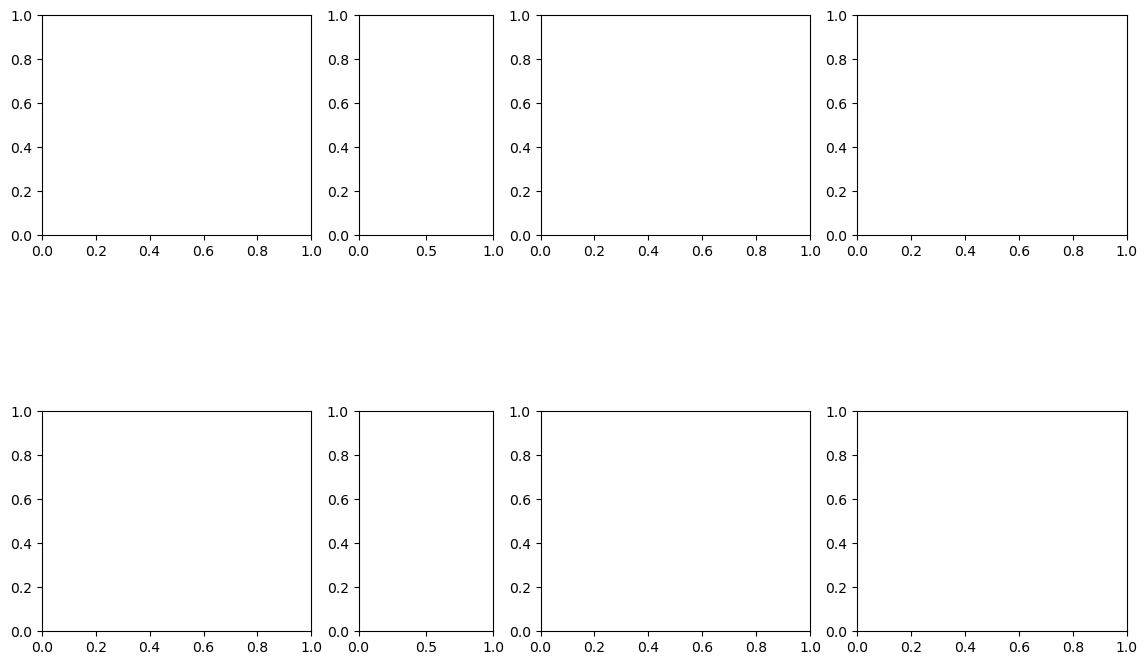

In [2]:
# Set up figure

fig = plt.figure()

fig, ax = plt.subplots(2, 4, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 1, 2, 2], 'hspace': .8})

# Parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 18}
title_text_params = {'fontweight': 'bold', 'fontsize': 16}
subtitle_text_params = {'fontsize': 16}

fig


In [3]:
def plot_coral_image(ax, image, size=25, colors=['#EE8382', '#508991', '#172A3A']):
    # Flip image
    # image = np.flipud(image)

    # Parameters
    levels = [0, 1, 2]
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    return ax



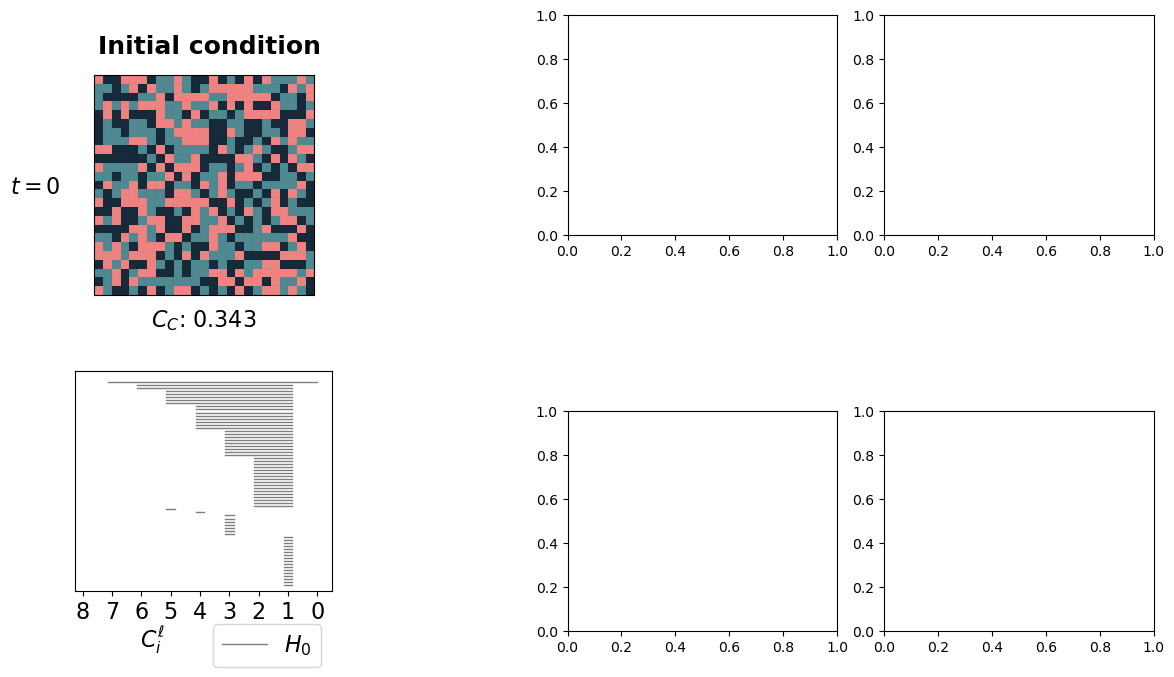

In [4]:

## Plot

df = pd.read_csv('./output/25x25/grid0/grazing54/threshold145/'
                 'coral33-macro33-r10-d40-a20-y75-time110-rec10-nsim2.csv')
image = np.genfromtxt(
    [df[(df.timestep == 0) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
image = image.reshape((25, 25))
neighborhood_descriptors = eval(
    (df[(df.timestep == 0) & (df.simulation == 1)]['coral_neighbors'].values[0]).replace(' ', ','))

ax[0, 0] = plot_coral_image(ax[0, 0], image)

for i in range(2):
    ax[i, 1].set_yticks([])
    ax[i, 1].set_xticks([])
    ax[i, 1].set_xticks(np.arange(-.5, 25, 1), minor=True)
    ax[i, 1].set_yticks(np.arange(-.5, 25, 1), minor=True)
    ax[i, 1].tick_params(which='minor', top=[], left=[], right=[], bottom=[])
    ax[i, 1].set_frame_on(False)

ax[0, 0].set_xlabel('$C_C$: ' + str(round(neighborhood_descriptors[0], 3)), fontdict=subtitle_text_params)
ax[0, 0].text(-10, 13, '$t=0$', fontdict=subtitle_text_params)
ax[0, 0].grid(color='black', linestyle='-', linewidth=.1, which='minor', alpha=.1)
ax[0, 0].text(0, -3, 'Initial condition', fontdict=heading_text_params)

ax[1, 0] = TDAtl.ph_barcode(ax[1, 0], image, group=0, fontdict=subtitle_text_params, show_legend=True, thickness=1)

position1 = ax[0, 0].get_position()
ax[0, 0].set_position(
    matplotlib.transforms.Bbox([[position1.xmin, position1.ymin - .15], [position1.xmax, position1.ymax]]))
position2 = ax[1, 0].get_position()
step = .05
ax[1, 0].set_position(
    matplotlib.transforms.Bbox([[position2.xmin, position2.ymin + step], [position2.xmax, position2.ymax + step]]))

fig

In [10]:
## Plot
fig, ax = plt.subplots()

def plot_coral_image(ax, image, size=25, colors=['#EE8382', '#508991', '#172A3A']):
    # Flip image
    # image = np.flipud(image)

    # Parameters
    levels = [0, 1, 2]
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    return ax

df = pd.read_csv('./output/25x25/grid0/grazing54/threshold145/'
                 'coral33-macro33-r10-d40-a20-y75-time110-rec10-nsim2.csv')
image = np.genfromtxt(
    [df[(df.timestep == 0) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
image = image.reshape((25, 25))
neighborhood_descriptors = eval(
    (df[(df.timestep == 0) & (df.simulation == 1)]['coral_neighbors'].values[0]).replace(' ', ','))

ax = plot_coral_image(ax, image)

fig.savefig('test.pdf')

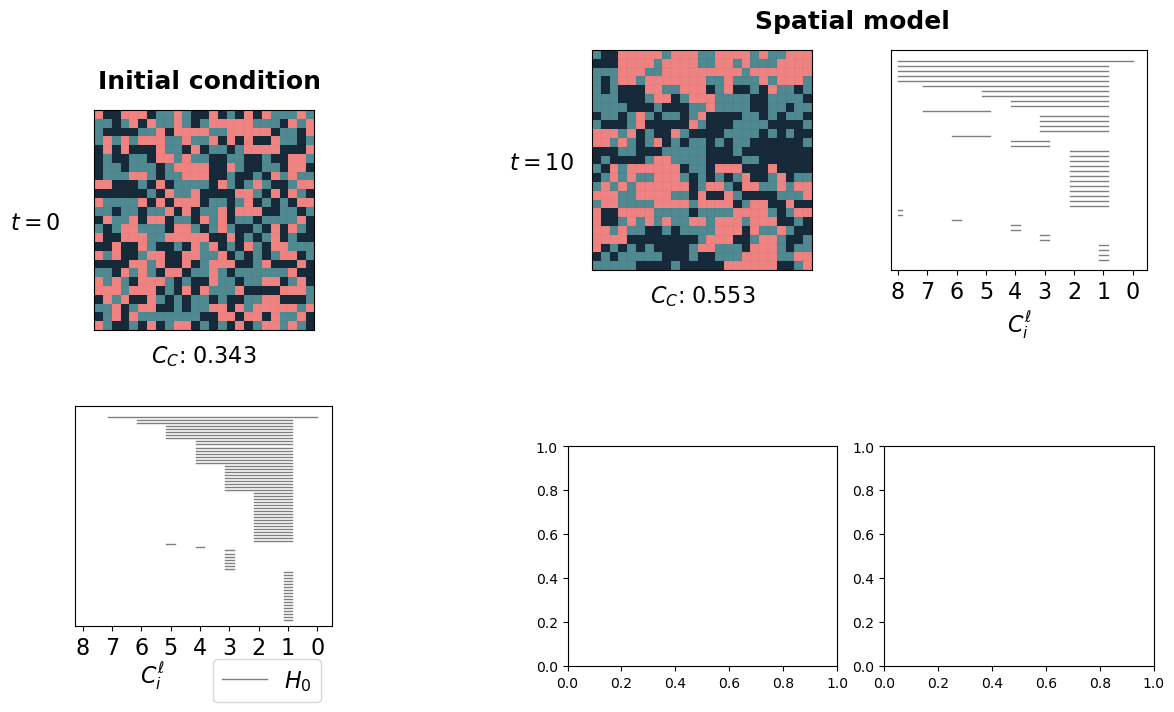

In [5]:


## Plot
df = pd.read_csv(
    './output/25x25/grid0/grazing54/threshold145/coral33-macro33-r10-d40-a20-y75-time110-rec10-nsim2.csv')

image = np.genfromtxt(
    [df[(df.timestep == 100) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
image = image.reshape((25, 25))
neighborhood_descriptors = eval(
    df[(df.timestep == 100) & (df.simulation == 1)]['coral_neighbors'].values[0].replace('  ', ',').replace(' ', ','))

ax[0, 2] = plot_coral_image(ax[0, 2], image)
ax[0, 2].text(18, -3, 'Spatial model', fontdict=heading_text_params)
ax[0, 2].set_xlabel('$C_C$: ' + str(round(neighborhood_descriptors[0], 3)), fontdict=subtitle_text_params)
ax[0, 2].text(-10, 13, '$t=10$', fontdict=subtitle_text_params)

ax[0, 3] = TDAtl.ph_barcode(ax[0, 3], image, group=0, fontdict=subtitle_text_params, thickness=1)

fig


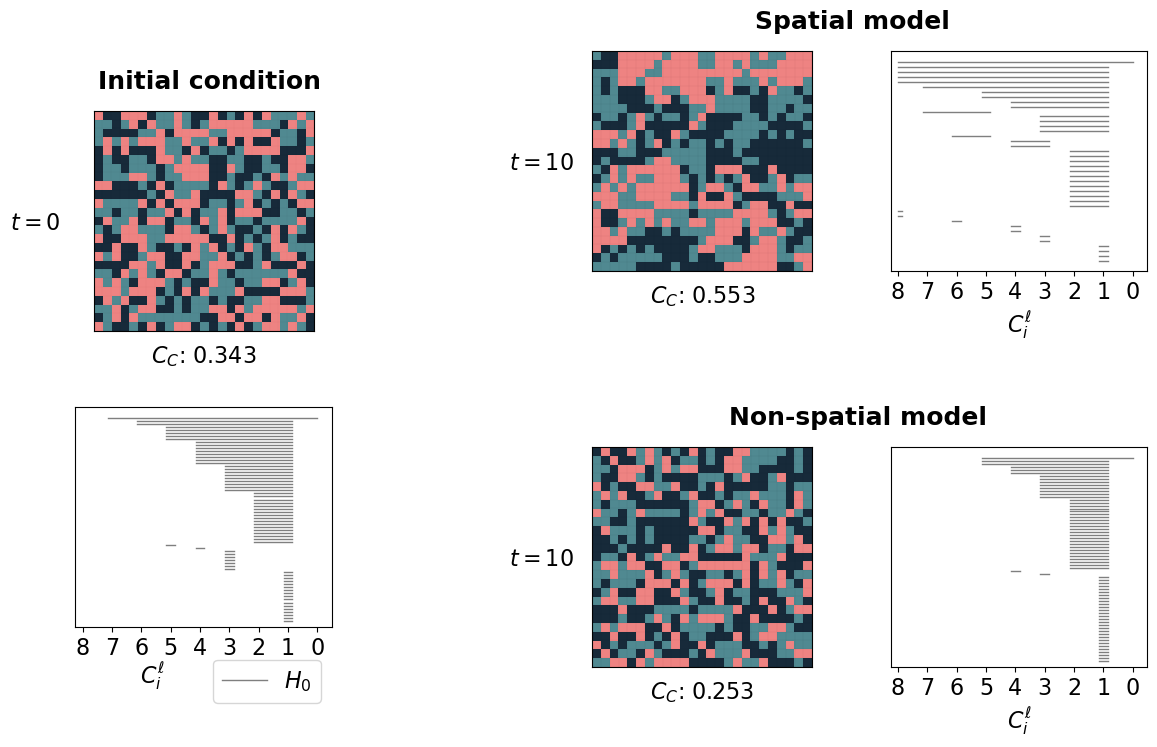

In [6]:

df = pd.read_csv(
    './output/25x25/grid0/grazing54/threshold3600/coral33-macro33-r10-d40-a20-y75-time110-rec10-nsim2.csv')

image = np.genfromtxt(
    [df[(df.timestep == 100) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
image = image.reshape((25, 25))
neighborhood_descriptors = eval(
    df[(df.timestep == 100) & (df.simulation == 1)]['coral_neighbors'].values[0].replace('  ', ',').replace(' ', ','))

ax[1, 2] = plot_coral_image(ax[1, 2], image)

ax[1, 2].set_xlabel('$C_C$: ' + str(round(neighborhood_descriptors[0], 3)), fontdict=subtitle_text_params)
ax[1, 2].text(-10, 13, '$t=10$', fontdict=subtitle_text_params)

ax[1, 2].text(15, -3, 'Non-spatial model', fontdict=heading_text_params)

ax[1, 3] = TDAtl.ph_barcode(ax[1, 3], image, group=0, fontdict=subtitle_text_params, thickness=1)
# plt.savefig(path + 'PH2' + extension, dpi=400, bbox_inches = "tight")


# plt.suptitle("Early Evolution, \n $t$ = 10",fontweight='bold',fontsize=12)
fig

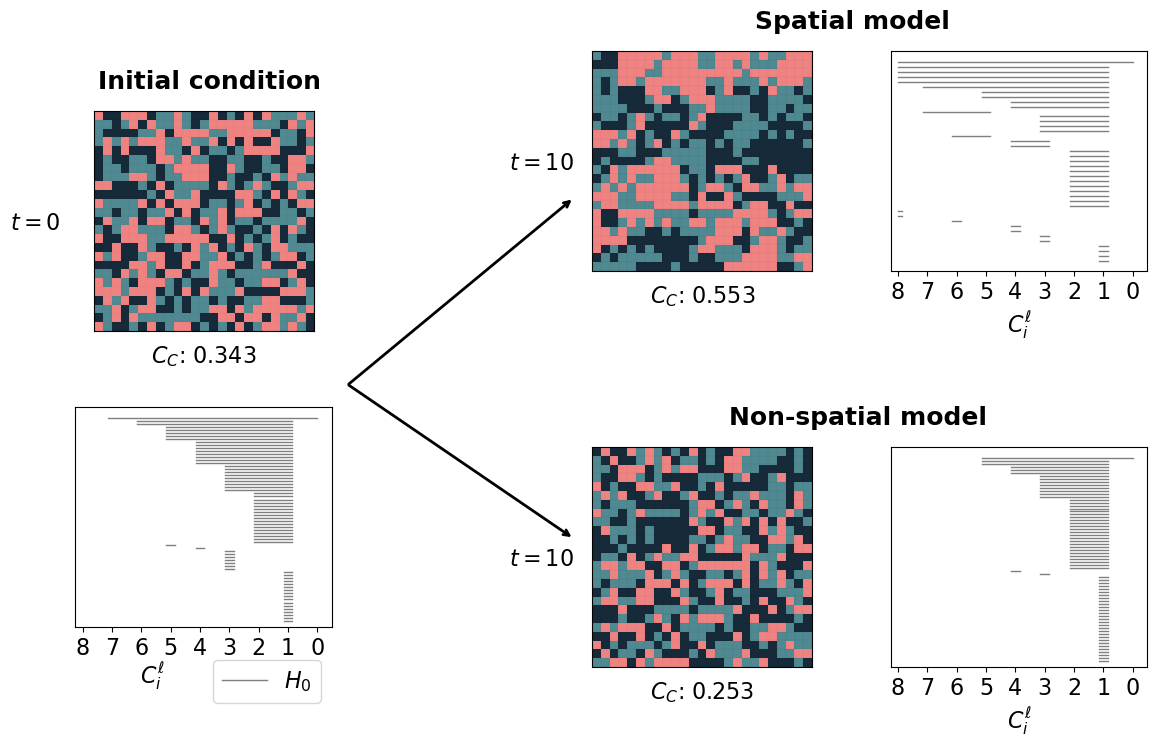

In [7]:

ax[1, 0].annotate('', xy=(-1, 1.095), xytext=(-8.75, 1.95),
                  arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                  zorder=2, annotation_clip=False)
ax[1, 0].annotate('', xy=(-1, 1.105), xytext=(-8.75, .4),
                  arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                  zorder=2, annotation_clip=False)
fig

In [8]:
fig.savefig('./figures/paper/3_threshold_change/fig3.pdf',bbox_inches='tight')